In [10]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
import os
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
print(keras.__version__)
print(tensorflow.__version__)

3.3.3
2.16.1


In [11]:
train_Data_path = r"D:\Data Science\LiveMaskDetection\face-mask-12k-images-dataset\Face Mask Dataset\Train"
validation_data_path = r"D:\Data Science\LiveMaskDetection\face-mask-12k-images-dataset\Face Mask Dataset\Validation"

In [14]:
training_datagen = ImageDataGenerator(rescale=1./255)
training_data = training_datagen.flow_from_directory(train_Data_path,
                                                    target_size=(200,200),
                                                    batch_size=128,
                                                    class_mode='binary')

Found 10000 images belonging to 2 classes.


In [15]:
training_data.class_indices

{'WithMask': 0, 'WithoutMask': 1}

In [16]:
valid_datagen = ImageDataGenerator(rescale=1./255)
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                                    target_size=(200,200),
                                                    batch_size=128,
                                                    class_mode='binary')

Found 800 images belonging to 2 classes.


In [21]:
model_path = r"D:\Data Science\LiveMaskDetection\model\model.keras"
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]



In [24]:
# Building cnn model
cnn_model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=5,input_shape = [200,200,3]),
    keras.layers.MaxPooling2D(pool_size=(4,4)),
    keras.layers.Conv2D(filters=64,kernel_size=4),
    keras.layers.MaxPooling2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=128,kernel_size=3),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256,kernel_size=2),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=2,activation='softmax')
])

cnn_model.compile(optimizer = Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = cnn_model.fit(training_data,
                        epochs=50,
                        verbose=1,
                        validation_data=valid_data,
                        callbacks=callbacks_list)

Epoch 1/50


C:\Users\Acer\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7641 - loss: 0.4397
Epoch 1: val_accuracy improved from -inf to 0.97375, saving model to D:\Data Science\LiveMaskDetection\model\model.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.7656 - loss: 0.4375 - val_accuracy: 0.9737 - val_loss: 0.0819
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step - accuracy: 0.9620 - loss: 0.1094
Epoch 2: val_accuracy improved from 0.97375 to 0.98125, saving model to D:\Data Science\LiveMaskDetection\model\model.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 38s 464ms/step - accuracy: 0.9621 - loss: 0.1092 - val_accuracy: 0.9812 - val_loss: 0.0576
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step - accuracy: 0.9788 - loss: 0.0676
Epoch 3: val_accuracy improved from 0.98125 to 0.99125, saving model to D:\Data Science\LiveMaskDetection\model\model.keras
79/79 ━━━━━━━━━━━━━━━━━━━━ 40s 492ms/step - accuracy: 0.9788 - loss: 0.0676 - val_accuracy: 0.9912 - val_loss: 0.0299
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━

Epoch 25/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.9943 - loss: 0.0195
Epoch 25: val_accuracy did not improve from 0.99625
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 446ms/step - accuracy: 0.9943 - loss: 0.0195 - val_accuracy: 0.9925 - val_loss: 0.0219
Epoch 26/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9961 - loss: 0.0104
Epoch 26: val_accuracy did not improve from 0.99625
79/79 ━━━━━━━━━━━━━━━━━━━━ 36s 444ms/step - accuracy: 0.9961 - loss: 0.0104 - val_accuracy: 0.9850 - val_loss: 0.0478
Epoch 27/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.9939 - loss: 0.0165
Epoch 27: val_accuracy did not improve from 0.99625
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 449ms/step - accuracy: 0.9939 - loss: 0.0165 - val_accuracy: 0.9937 - val_loss: 0.0182
Epoch 28/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9959 - loss: 0.0122
Epoch 28: val_accuracy did not improve from 0.99625
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 447ms/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy

Epoch 50/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.9997 - loss: 0.0023
Epoch 50: val_accuracy did not improve from 0.99875
79/79 ━━━━━━━━━━━━━━━━━━━━ 37s 446ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9975 - val_loss: 0.0180


In [26]:
def plot_graphs(histoy, string):
    plt.plot(histoy.history[string])
    plt.plot(histoy.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

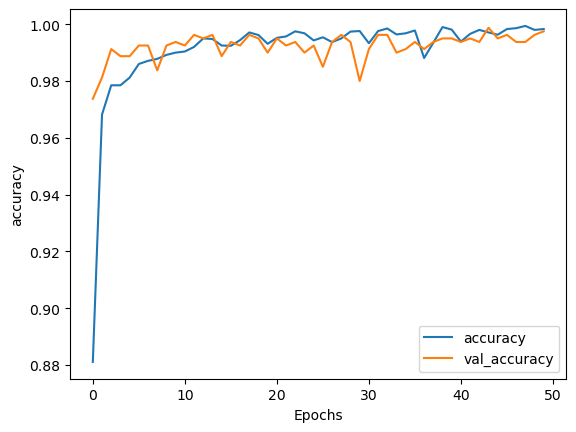

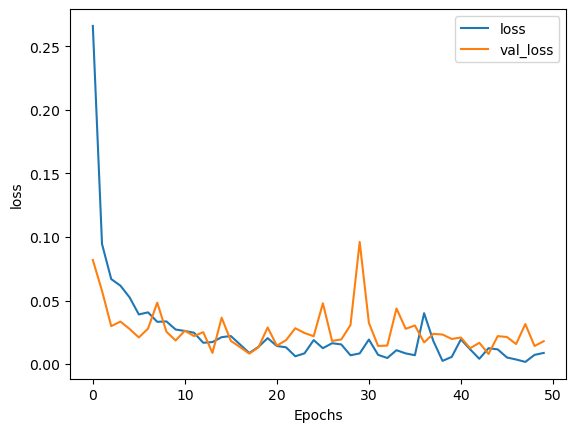

In [27]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [28]:
cnn_model.save(r'D:\Data Science\LiveMaskDetection\model\model_last.h5')

In [29]:
cnn_model.save(r'D:\Data Science\LiveMaskDetection\model\model_last.keras')